<h1 style='text-aling:center;color:Navy'>  Big Data Systems - Fall 2021  </h1>
<h1 style='text-aling:center;color:Navy'>  Assignment 4  </h1>

***

<b>Submission Deadline: This assignment is due Wednesday, Oct 27 at 11:59 P.M.</b>

A few notes before you start:
- Directly sharing answers is not okay, but discussing problems with other students is encouraged.
- You should start early so that you have time to get help if you're stuck.

- Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>
<br>
Before you begin completing the assignment, execute the following cell to load the provided tests.

In [45]:
# Don't change this cell; just run it. 
# When you log-in please hit return (not shift + return) after typing in your email
from client.api.notebook import Notebook
ok = Notebook('Assignment4.ok')

Assignment: Assignment4: Data-Modeling
OK, version v1.15.44



In [3]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not automatically save 'Assignment4.ipynb'
Make sure your notebook is correctly named and saved before submitting to OK!
Making a best attempt to submit latest 'Assignment4.ipynb', last modified at Fri Oct 29 22:51:57 2021


/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Submit... 100% complete
Submission successful for user: vijayasimha.bheemireddy@ucdenver.edu
URL: https://kubemaster.ucdenver.pvt:5000/UCDenver/CSCI4951-5951/fa21/assignment4/submissions/boYJKe



<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style="color:#3665af">Big Data Learning with Scikit-learn </span>
<hr>

###### Goal
In this assignment, we will learn how to use linear regression in Scikit-learn to estimate values in a connected vehicles dataset.

###### Prerequisites
This assignment has the following dependencies:
- Jupyter Notebook, along with the following libraries (which should be installed on the Computing Platform):
  - Scikit Learn
  - Numpy
  - Pandas
  - matplotlib


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">Assignment Hands-on 

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">1. Setup </div>

- Visualize the position data, get some intuition about the geography
- Reduce the columns to the ones related to position and speed

In [46]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [47]:
# this data comes from the US DoT data website
# it is from a trial of connected vehicles travelling between Laramie and Cheyenne, WY
# https://data.transportation.gov/Automobiles/Wyoming-CV-Pilot-Basic-Safety-Message-One-Day-Samp/9k4m-a3jc
dataSrc = pd.read_csv("data/Wyoming_CV_Pilot_Basic_Safety_Message_One_Day_Sample.csv", low_memory=False)
dataSrc.info()
dataSrc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   metadata_generatedAt                     32868 non-null  object 
 1   metadata_logFileName                     32868 non-null  object 
 2   metadata_validSignature                  32868 non-null  bool   
 3   metadata_sanitized                       32868 non-null  bool   
 4   metadata_payloadType                     32868 non-null  object 
 5   metadata_serialId_streamId               32868 non-null  object 
 6   metadata_serialId_bundleSize             32868 non-null  int64  
 7   metadata_serialId_bundleId               32868 non-null  int64  
 8   metadata_serialId_recordId               32868 non-null  int64  
 9   metadata_serialId_serialNumber           32868 non-null  int64  
 10  metadata_receivedAt                      32868

,metadata_generatedAt,metadata_logFileName,metadata_validSignature,metadata_sanitized,metadata_payloadType,metadata_serialId_streamId,metadata_serialId_bundleSize,metadata_serialId_bundleId,metadata_serialId_recordId,metadata_serialId_serialNumber,...,part2_suve_cd_role,part2_suve_vd_height,part2_suve_vd_mass,part2_suve_vd_trailerweight,part2_vse_events,part2_vse_ph_crumbdata,part2_vse_pp_confidence,part2_vse_pp_radiusofcurve,part2_vse_lights,coreData_position
0,11/15/2017 01:35:17 AM,bsmLogDuringEvent_1510709733_2620:31:40e0:876:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,9bfac6a4-ff35-4e40-bf4d-14a5e9b7c6c9,1,65,2,0,...,basicVehicle,NaN,NaN,NaN,NaN,"[{'elevationOffset': 0.1, 'latOffset': -0.0003...",70,33.6,NaN,"{type=Point, coordinates=List(-104.7273576, 41..."
1,11/15/2017 01:35:22 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,658a36b5-9028-43c4-8bd1-32f18d581539,1,1626,2,0,...,basicVehicle,NaN,NaN,NaN,NaN,"[{'elevationOffset': 0.5, 'latOffset': -7.82e-...",90,71.9,NaN,"{type=Point, coordinates=List(-104.7285596, 41..."
2,11/15/2017 01:35:15 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,30d1261b-c346-4749-977d-5ea0e31aaf99,1,1626,2,0,...,basicVehicle,NaN,NaN,NaN,NaN,"[{'elevationOffset': 0.3, 'latOffset': -0.0003...",80,36.0,NaN,"{type=Point, coordinates=List(-104.725978, 41...."
3,11/15/2017 01:35:22 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,d469a354-6bce-4909-9f88-f3129927efa8,1,1626,2,0,...,basicVehicle,NaN,NaN,NaN,NaN,"[{'elevationOffset': 0.4, 'latOffset': -6.86e-...",90,90.0,NaN,"{type=Point, coordinates=List(-104.7285244, 41..."
4,11/15/2017 01:35:09 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,9a3af8ca-b1f6-4324-8466-e9dc2e50477c,1,1626,2,0,...,basicVehicle,NaN,NaN,NaN,NaN,"[{'elevationOffset': 0.5, 'latOffset': -0.0004...",90,-114.9,NaN,"{type=Point, coordinates=List(-104.7241604, 41..."


In [48]:
# looking for the "coreData" columns instead of the "metaData" columns 
allColumns = list(filter(lambda colName: colName.startswith('coreData'), dataSrc.columns))
allColumns

['coreData_msgCnt',
 'coreData_id',
 'coreData_secMark',
 'coreData_position_lat',
 'coreData_position_long',
 'coreData_elevation',
 'coreData_accelset_accelYaw',
 'coreData_accuracy_semiMajor',
 'coreData_accuracy_semiMinor',
 'coreData_transmission',
 'coreData_speed',
 'coreData_heading',
 'coreData_brakes_wheelBrakes_leftFront',
 'coreData_brakes_wheelBrakes_rightFront',
 'coreData_brakes_wheelBrakes_unavailable',
 'coreData_brakes_wheelBrakes_leftRear',
 'coreData_brakes_wheelBrakes_rightRear',
 'coreData_brakes_traction',
 'coreData_brakes_abs',
 'coreData_brakes_scs',
 'coreData_brakes_brakeBoost',
 'coreData_brakes_auxBrakes',
 'coreData_size',
 'coreData_position']

In [49]:
dataSrc.loc[:,allColumns]

,coreData_msgCnt,coreData_id,coreData_secMark,coreData_position_lat,coreData_position_long,coreData_elevation,coreData_accelset_accelYaw,coreData_accuracy_semiMajor,coreData_accuracy_semiMinor,coreData_transmission,...,coreData_brakes_wheelBrakes_unavailable,coreData_brakes_wheelBrakes_leftRear,coreData_brakes_wheelBrakes_rightRear,coreData_brakes_traction,coreData_brakes_abs,coreData_brakes_scs,coreData_brakes_brakeBoost,coreData_brakes_auxBrakes,coreData_size,coreData_position
0,96,58BA0000,17100,41.126867,-104.727358,1791.5,0.00,2.1,2.80,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 200, 'length': 570}","{type=Point, coordinates=List(-104.7273576, 41..."
1,57,B93F5435,22600,41.126519,-104.728560,1795.5,0.00,2.3,3.65,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 190, 'length': 520}","{type=Point, coordinates=List(-104.7285596, 41..."
2,111,B93F5435,15200,41.127306,-104.725978,1792.2,0.67,2.3,3.65,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 190, 'length': 520}","{type=Point, coordinates=List(-104.725978, 41...."
3,56,B93F5435,22500,41.126528,-104.728524,1795.4,0.00,2.3,3.65,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 190, 'length': 520}","{type=Point, coordinates=List(-104.7285244, 41..."
4,57,B93F5435,9800,41.127949,-104.724160,1791.4,0.00,2.3,3.65,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 190, 'length': 520}","{type=Point, coordinates=List(-104.7241604, 41..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32863,79,0AE70000,4400,41.157918,-104.651846,1804.1,0.00,3.1,3.40,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 490, 'length': 1190}","{type=Point, coordinates=List(-104.651846, 41...."
32864,101,0AE70000,32200,41.156389,-104.659532,1809.3,-0.40,3.1,3.40,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 490, 'length': 1190}","{type=Point, coordinates=List(-104.6595321, 41..."
32865,7,0AE70000,35600,41.156152,-104.660456,1810.6,0.00,3.1,3.40,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 490, 'length': 1190}","{type=Point, coordinates=List(-104.6604561, 41..."
32866,18,0AE70000,36700,41.156070,-104.660762,1810.9,0.00,3.1,3.40,NEUTRAL,...,True,False,False,unavailable,unavailable,unavailable,unavailable,unavailable,"{'width': 490, 'length': 1190}","{type=Point, coordinates=List(-104.6607622, 41..."


In [50]:
dataSrc.loc[:,'coreData_heading']

0        247.8375
1        250.0625
2        245.8625
3        249.9625
4        244.9125
           ...   
32863    259.6500
32864    251.7250
32865    249.9125
32866    250.5875
32867    254.0625
Name: coreData_heading, Length: 32868, dtype: float64

In [51]:
#dataSrc.loc[:,['coreData_brakes_wheelBrakes_leftFront','coreData_brakes_wheelBrakes_rightFront','coreData_brakes_wheelBrakes_unavailable','coreData_brakes_wheelBrakes_leftRear','coreData_brakes_wheelBrakes_rightRear']]
col = ['coreData_brakes_wheelBrakes_leftFront','coreData_brakes_wheelBrakes_rightFront','coreData_brakes_wheelBrakes_unavailable','coreData_brakes_wheelBrakes_leftRear','coreData_brakes_wheelBrakes_rightRear']
for i in col:
    print(i)
    print(dataSrc[i].unique())

coreData_brakes_wheelBrakes_leftFront
[False]
coreData_brakes_wheelBrakes_rightFront
[False]
coreData_brakes_wheelBrakes_unavailable
[ True]
coreData_brakes_wheelBrakes_leftRear
[False]
coreData_brakes_wheelBrakes_rightRear
[False]


In [52]:
dataSrc['Heading_elevation'] = dataSrc['coreData_elevation'] * dataSrc['coreData_heading']

In [53]:
dataSrc['Heading+elevation'] = dataSrc['coreData_elevation'] + dataSrc['coreData_heading']

In [54]:
#print(allColumns)
allColumns1 = allColumns
allColumns1.append('Heading_elevation')
allColumns1.append('Heading+elevation')
print(allColumns1)

['coreData_msgCnt', 'coreData_id', 'coreData_secMark', 'coreData_position_lat', 'coreData_position_long', 'coreData_elevation', 'coreData_accelset_accelYaw', 'coreData_accuracy_semiMajor', 'coreData_accuracy_semiMinor', 'coreData_transmission', 'coreData_speed', 'coreData_heading', 'coreData_brakes_wheelBrakes_leftFront', 'coreData_brakes_wheelBrakes_rightFront', 'coreData_brakes_wheelBrakes_unavailable', 'coreData_brakes_wheelBrakes_leftRear', 'coreData_brakes_wheelBrakes_rightRear', 'coreData_brakes_traction', 'coreData_brakes_abs', 'coreData_brakes_scs', 'coreData_brakes_brakeBoost', 'coreData_brakes_auxBrakes', 'coreData_size', 'coreData_position', 'Heading_elevation', 'Heading+elevation']


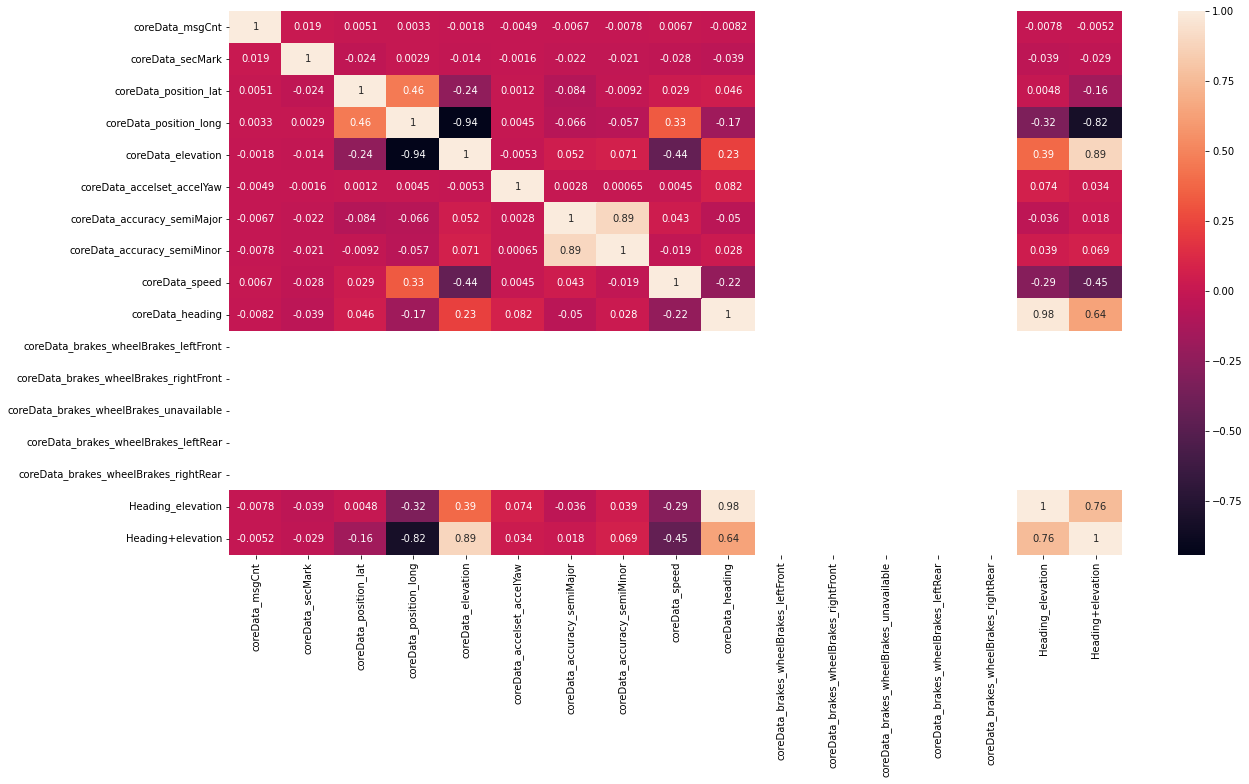

In [60]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = dataSrc.loc[:,allColumns1].corr()
plt.figure(figsize=(20,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [57]:
!pip install seaborn

     |████████████████████████████████| 292 kB 30.7 MB/s eta 0:00:01
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
ERROR: test-9112736 1.15.44 has requirement certifi==2019.11.28, but you'll have certifi 2021.10.8 which is incompatible.
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'metadata.json'
Consider using the `--user` option or check the permissions.



In [12]:
dataSrc.head()

,metadata_generatedAt,metadata_logFileName,metadata_validSignature,metadata_sanitized,metadata_payloadType,metadata_serialId_streamId,metadata_serialId_bundleSize,metadata_serialId_bundleId,metadata_serialId_recordId,metadata_serialId_serialNumber,...,part2_suve_vd_mass,part2_suve_vd_trailerweight,part2_vse_events,part2_vse_ph_crumbdata,part2_vse_pp_confidence,part2_vse_pp_radiusofcurve,part2_vse_lights,coreData_position,Heading_elevation,Heading+elevation
0,11/15/2017 01:35:17 AM,bsmLogDuringEvent_1510709733_2620:31:40e0:876:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,9bfac6a4-ff35-4e40-bf4d-14a5e9b7c6c9,1,65,2,0,...,NaN,NaN,NaN,"[{'elevationOffset': 0.1, 'latOffset': -0.0003...",70,33.6,NaN,"{type=Point, coordinates=List(-104.7273576, 41...",444000.88125,2039.3375
1,11/15/2017 01:35:22 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,658a36b5-9028-43c4-8bd1-32f18d581539,1,1626,2,0,...,NaN,NaN,NaN,"[{'elevationOffset': 0.5, 'latOffset': -7.82e-...",90,71.9,NaN,"{type=Point, coordinates=List(-104.7285596, 41...",448987.21875,2045.5625
2,11/15/2017 01:35:15 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,30d1261b-c346-4749-977d-5ea0e31aaf99,1,1626,2,0,...,NaN,NaN,NaN,"[{'elevationOffset': 0.3, 'latOffset': -0.0003...",80,36.0,NaN,"{type=Point, coordinates=List(-104.725978, 41....",440634.77250,2038.0625
3,11/15/2017 01:35:22 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,d469a354-6bce-4909-9f88-f3129927efa8,1,1626,2,0,...,NaN,NaN,NaN,"[{'elevationOffset': 0.4, 'latOffset': -6.86e-...",90,90.0,NaN,"{type=Point, coordinates=List(-104.7285244, 41...",448782.67250,2045.3625
4,11/15/2017 01:35:09 AM,bsmLogDuringEvent_1510709825_2620:31:40e0:877:...,True,True,us.dot.its.jpo.ode.model.OdeBsmPayload,9a3af8ca-b1f6-4324-8466-e9dc2e50477c,1,1626,2,0,...,NaN,NaN,NaN,"[{'elevationOffset': 0.5, 'latOffset': -0.0004...",90,-114.9,NaN,"{type=Point, coordinates=List(-104.7241604, 41...",438736.25250,2036.3125


In [13]:
coreData_secMark(-0.02)
coreData_position_lat(0.02)
coreData_accuracy_semiMajor(0.04)
coreData_accuracy_semiMinor(-0.019)

coreData_position_long(0.3)
coreData_elevation(-0.43)
coreData_heading(-0.22)

coreData_elevation, coreData_position_long, coreData_heading

coreData_elevation, coreData_heading, coreData_elevation+coreData_heading(-0.44)
coreData_elevation*coreData_headin(direction)g???????????


coreData_accuracy_semiMajor(0.04)
coreData_secMark(time)(-0.02)
coreData_position_lat(0.02)
coreData_accuracy_semiMinor(-0.019)

coreData_accuracy_semiMajor, coreData_secMark, coreData_position_lat, coreData_accuracy_semiMinor

SyntaxError: invalid syntax (<ipython-input-13-28a3916a0e8d>, line 13)

In [14]:
dataSrc.loc[:,['coreData_elevation', 'coreData_heading', 'Heading+elevation']]

,coreData_elevation,coreData_heading,Heading+elevation
0,1791.5,247.8375,2039.3375
1,1795.5,250.0625,2045.5625
2,1792.2,245.8625,2038.0625
3,1795.4,249.9625,2045.3625
4,1791.4,244.9125,2036.3125
...,...,...,...
32863,1804.1,259.6500,2063.7500
32864,1809.3,251.7250,2061.0250
32865,1810.6,249.9125,2060.5125
32866,1810.9,250.5875,2061.4875


In [15]:
dataSrc.loc[:,['coreData_position_lat','coreData_position_long']]

,coreData_position_lat,coreData_position_long
0,41.126867,-104.727358
1,41.126519,-104.728560
2,41.127306,-104.725978
3,41.126528,-104.728524
4,41.127949,-104.724160
...,...,...
32863,41.157918,-104.651846
32864,41.156389,-104.659532
32865,41.156152,-104.660456
32866,41.156070,-104.660762


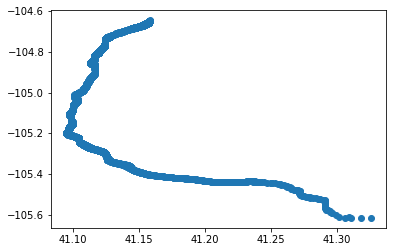

In [16]:
# this should resemble the roadway from Laramie, WY to Cheyenne, WY
plt.scatter(dataSrc['coreData_position_lat'], dataSrc['coreData_position_long'])

<img src="map-projection-of-data.png" alt="Map projection of data" style="width: 400px;"/>

Hmm, that roadway kind of looks similar, but, a little off. That's because we are treating latitude and longitude as euclidian coordinates, when they are actually coordinates projected onto a sphere.

Can we see a relationship between latitude values and elevation?

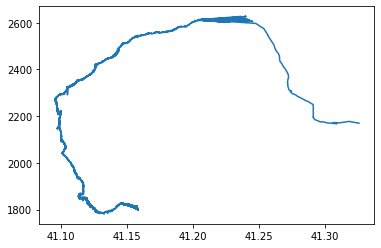

In [17]:
coordinateSortedData = dataSrc.sort_values(by=['coreData_position_long', 'coreData_position_lat'])
plt.plot(coordinateSortedData['coreData_position_lat'], coordinateSortedData['coreData_elevation'])

One issue we note with this immediately: latitude is not a valid function of elevation, since some latitude values project multiple values in elevation. In other words, there is no bijection between all latitude points and elevation points. 

What about with respect to the longitudinal data points?

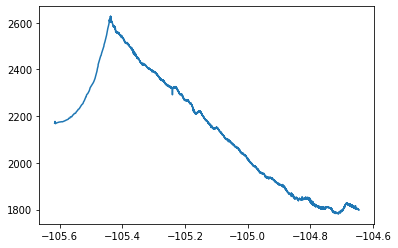

In [18]:
plt.plot(coordinateSortedData['coreData_position_long'], coordinateSortedData['coreData_elevation'])

Longitude appears to have a proper bijection to the domain of elevation points. We will consider this later when we build our linear model.

Wait, how many columns did our raw data have?

In [19]:
print(str(len(allColumns)) + " columns")

26 columns


We don't need all 24. Let's just focus in on the columns that are related to position and movement. We can even rename them to something easier on the eye.

In [20]:
dataSubset = dataSrc[['coreData_position_lat','coreData_position_long','coreData_secMark','coreData_elevation','coreData_speed', 'coreData_heading']]
dataSubset = dataSubset.rename(columns={'coreData_position_lat':'lat','coreData_position_long':'lon','coreData_secMark':'time','coreData_elevation':'height','coreData_speed':'speed', 'coreData_heading': 'direction'})
dataSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        32868 non-null  float64
 1   lon        32868 non-null  float64
 2   time       32868 non-null  int64  
 3   height     32868 non-null  float64
 4   speed      32868 non-null  float64
 5   direction  32868 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.5 MB


Two of the columns are using the metric system. Here are two transforms we can use to switch away from the metric system to the USCU system (aka, feet and miles).

In [21]:
def metersToFeet(x):
    return x * 3.28084
def metersPerSecToMPH(x):
    return (metersToFeet(x) * 3600) / 5280

Let's convert the data in `dataSubset` from metric to our American distance measures, and store that in a new copy of the `dataSubset`. We do this because we want to manipulate data for analysis but maintain a copy without edits for any future analysis.

In [22]:
dataFt = dataSubset.copy()
dataFt['height'] = metersToFeet(dataSubset['height'])
dataFt['speed'] = metersPerSecToMPH(dataSubset['speed'])
dataFt

,lat,lon,time,height,speed,direction
0,41.126867,-104.727358,17100,5877.624860,70.687189,247.8375
1,41.126519,-104.728560,22600,5890.748220,70.239802,250.0625
2,41.127306,-104.725978,15200,5879.921448,70.374018,245.8625
3,41.126528,-104.728524,22500,5890.420136,70.284541,249.9625
4,41.127949,-104.724160,9800,5877.296776,70.105586,244.9125
...,...,...,...,...,...,...
32863,41.157918,-104.651846,4400,5918.963444,53.104869,259.6500
32864,41.156389,-104.659532,32200,5936.023812,53.910166,251.7250
32865,41.156152,-104.660456,35600,5940.288904,53.999644,249.9125
32866,41.156070,-104.660762,36700,5941.273156,54.133860,250.5875


Now, what can we say about these columns? One way to find out is to call `describe()` on each of them.

In [23]:
dataFt['lat'].describe()

count    32868.000000
mean        41.135849
std          0.020855
min         41.095102
25%         41.118991
50%         41.127936
75%         41.154254
max         41.325833
Name: lat, dtype: float64

In [24]:
dataFt['lon'].describe()

count    32868.000000
mean      -104.779413
std          0.170979
min       -105.616132
25%       -104.808981
50%       -104.730790
75%       -104.666441
max       -104.644505
Name: lon, dtype: float64

In [25]:
dataFt['height'].describe()

count    32868.000000
mean      6143.179182
std        502.818281
min       5845.472628
25%       5945.210164
50%       5969.160296
75%       6054.134052
max       8620.407100
Name: height, dtype: float64

<br>

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;"> 2. A Regression Proof-of-concept </div>

Let's show ourselves that building a linear model does what we think it should do

- Let's predict elevation based on position
  - Let's make our first linear model _fit_ to the longitudinal data
  - We will try different features and different linear regression models
  - Recall from above, there was a fairly obvious relationship between longitude and elevation. We will let the models show us that this was a relevant detail.

Our first model makes the assumption that a linear model on an x/y coordinate pair can be used to infer height. Put another way, we will use `lat` and `lon` (our _features_) to predict `height` (our _label_), using a linear model of the form `c_1(lat) + c_2(lon)`, where we are attempting to learn the coefficients `c_1` and `c_2` that best fit our training data.

In [26]:
# this may take some time.
latLonModel = svm.SVR()
X_train, X_test, y_train, y_test = train_test_split(dataFt[['lat','lon']], dataFt['height'], test_size=0.2)
latLonModel.fit(X_train, y_train)

SVR()

In [27]:
predictions = latLonModel.predict(X_test)

Text(0, 0.5, 'Predictions')

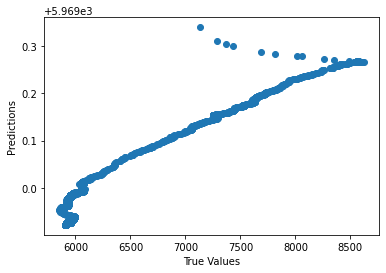

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [29]:
# how does it score?
print("Model Accuracy: {0:.2f}%".format(latLonModel.score(X_test, y_test) * 100))

Model Accuracy: -11.74%


This is not _bad_. It's also not _good_. Let's see if we can do better.

One common technique for fitting a regression model is to create **polynomial features**. These aim to create additional features that represent the polynomial terms of the inputs. For example, for some input column `x`, we can create additional columns to represent `x^2` and `x^3`.

In our case, let's see how creating an additional feature, `latlon` (computed as `latitude * longitude`) will help with our score.

In [30]:
polyFeatures = dataFt[['lat','lon']].copy()

# this is the line that adds a new column to polyFeatures that is the product of the columns lat and lon
polyFeatures['latlon'] = polyFeatures['lat'] * polyFeatures['lon']
polyFeatures

,lat,lon,latlon
0,41.126867,-104.727358,-4307.108086
1,41.126519,-104.728560,-4307.121086
2,41.127306,-104.725978,-4307.097343
3,41.126528,-104.728524,-4307.120643
4,41.127949,-104.724160,-4307.089949
...,...,...,...
32863,41.157918,-104.651846,-4307.252138
32864,41.156389,-104.659532,-4307.408437
32865,41.156152,-104.660456,-4307.421598
32866,41.156070,-104.660762,-4307.425708


Ok! Let's try with our new feature!

In [31]:
polyLonModel = svm.SVR()
X_train, X_test, y_train, y_test = train_test_split(polyFeatures[['lat','lon','latlon']], dataFt['height'], test_size=0.2)
polyLonModel.fit(X_train, y_train)

SVR()

In [32]:
predictions = polyLonModel.predict(X_test)

Text(0, 0.5, 'Predictions')

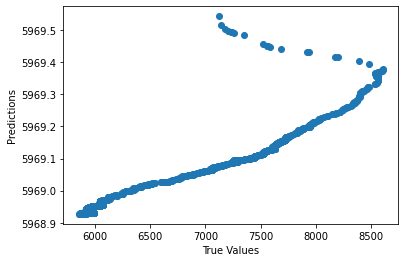

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [34]:
print(y_test)
print(predictions)

2518     6072.506756
3442     6056.430640
15878    6047.572372
28802    5968.504128
13676    5919.291528
            ...     
25840    5932.414888
7859     5932.742972
30010    5926.837460
18066    7111.548784
25458    5939.304652
Name: height, Length: 6574, dtype: float64
[5968.96858598 5968.96721055 5968.96312342 ... 5968.93122428 5969.07533229
 5968.93189874]


In [35]:
# how does it score?
print("Model Accuracy: {0:.2f}%".format(polyLonModel.score(X_test, y_test) * 100))

Model Accuracy: -12.60%


Much better! We doubled our accuracy without changing our model or data, but by coming up with more features from our data. Learning from the correct features is essential to good modeling.

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

<div style="font-size:30px;color:#3665af;background-color:#e1dfb1;padding:10px;">Exercise </div>

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;"> 3. Let's Predict Speed</div>

Predicting speed will be a bit more challenging, but, we have some intuition. Perhaps there are properties related to the highway that might produce similar speed ratings, such as a steep climb on an eastbound section, or passing through a section where there was construction all day long. Think about what vehicle travel is like while you work on your model. 

#### Do not get lost attempting perfection! Grading will be based mostly on your answers to the questions below. Make a reasonable effort at refining your model, put a few hours into it, and explain your process for a passing grade.

##### In order to answer these questions, do the following:

- Use our data points to fit some of the data to a linear model
  - _important_: you will need to set `speed` to be your training label
- Experiment with different polynomial features
  - see polyLonModel, above, for an example
- Try changing the parameters of SVR, such as kernel, C, gamma, and degree, when appropriate
  - see the [SVR documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) for a detailed description of these options.
- Try _at least one more_ of the following linear regression models that Scikit-Learn offers
  - [Lasso](http://scikit-learn.org/stable/modules/linear_model.html#lasso)
  - [ElasticNet](http://scikit-learn.org/stable/modules/linear_model.html#elastic-net)
  - [Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
- [optional] play with integrating other learners and tools from the Scikit-Learn toolkit, such as PCA


<div style="font-size:20px;background-color:#0B6713;color:#F1E6E7;padding:10px;">
    TO-DO:
</div>

In [38]:
coreData_elevation, coreData_heading, coreData_elevation+coreData_heading(-0.44)
coreData_elevation*coreData_headin(direction)g???????????

coreData_accuracy_semiMajor(0.04)
coreData_secMark(time)(-0.02)
coreData_position_lat(0.02)
coreData_accuracy_semiMinor(-0.019)


coreData_position_long(0.3)
coreData_elevation(-0.43)
coreData_heading(-0.22)

SyntaxError: invalid syntax (<ipython-input-38-853946e539cc>, line 2)

In [39]:
dataSubset1 = dataSrc[['coreData_elevation','coreData_heading', 'Heading+elevation' , 'coreData_speed', 'coreData_position_long', 'Heading_elevation']] #long????
#dataSubset1 = dataSrc[['coreData_elevation','coreData_heading', 'Heading+elevation', 'coreData_accuracy_semiMajor', 'coreData_secMark', 'coreData_position_lat', 'coreData_accuracy_semiMinor'  , 'coreData_speed']]
#dataSubset1 = dataSubset.rename(columns={'coreData_position_lat':'lat','coreData_position_long':'lon','coreData_secMark':'time','coreData_elevation':'height','coreData_speed':'speed', 'coreData_heading': 'direction'})
dataSubset1 = dataSubset1.rename(columns={'coreData_elevation':'height','coreData_heading':'direction','Heading+elevation':'headingelevation','coreData_speed':'speed'})
dataSubset1.info()


def metersToFeet(x):
    return x * 3.28084
def metersPerSecToMPH(x):
    return (metersToFeet(x) * 3600) / 5280

#standardise

dataFt1 = dataSubset1.copy()
dataFt1['height'] = metersToFeet(dataSubset1['height'])
dataFt1['speed'] = metersPerSecToMPH(dataSubset1['speed'])
dataFt1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   height                  32868 non-null  float64
 1   direction               32868 non-null  float64
 2   headingelevation        32868 non-null  float64
 3   speed                   32868 non-null  float64
 4   coreData_position_long  32868 non-null  float64
 5   Heading_elevation       32868 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


,height,direction,headingelevation,speed,coreData_position_long,Heading_elevation
0,5877.624860,247.8375,2039.3375,70.687189,-104.727358,444000.88125
1,5890.748220,250.0625,2045.5625,70.239802,-104.728560,448987.21875
2,5879.921448,245.8625,2038.0625,70.374018,-104.725978,440634.77250
3,5890.420136,249.9625,2045.3625,70.284541,-104.728524,448782.67250
4,5877.296776,244.9125,2036.3125,70.105586,-104.724160,438736.25250
...,...,...,...,...,...,...
32863,5918.963444,259.6500,2063.7500,53.104869,-104.651846,468434.56500
32864,5936.023812,251.7250,2061.0250,53.910166,-104.659532,455446.04250
32865,5940.288904,249.9125,2060.5125,53.999644,-104.660456,452491.57250
32866,5941.273156,250.5875,2061.4875,54.133860,-104.660762,453788.90375


In [40]:
dataFt1.info()
dataFt1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   height                  32868 non-null  float64
 1   direction               32868 non-null  float64
 2   headingelevation        32868 non-null  float64
 3   speed                   32868 non-null  float64
 4   coreData_position_long  32868 non-null  float64
 5   Heading_elevation       32868 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


,height,direction,headingelevation,speed,coreData_position_long,Heading_elevation
0,5877.624860,247.8375,2039.3375,70.687189,-104.727358,444000.88125
1,5890.748220,250.0625,2045.5625,70.239802,-104.728560,448987.21875
2,5879.921448,245.8625,2038.0625,70.374018,-104.725978,440634.77250
3,5890.420136,249.9625,2045.3625,70.284541,-104.728524,448782.67250
4,5877.296776,244.9125,2036.3125,70.105586,-104.724160,438736.25250


In [41]:
dataFt1.columns

Index(['height', 'direction', 'headingelevation', 'speed',
       'coreData_position_long', 'Heading_elevation'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler
dataSrc1 = dataSrc[['coreData_elevation','coreData_heading', 'Heading+elevation' , 'coreData_position_long', 'Heading_elevation','coreData_speed']]
dataSrc1.info()
dataSrc1_std = pd.DataFrame(StandardScaler().fit_transform(dataSrc1))
#dataSrc1[['coreData_elevation','coreData_heading', 'Heading+elevation' , 'coreData_speed', 'coreData_position_long', 'Heading_elevation']] = StandardScaler().fit_transform(df[['coreData_elevation','coreData_heading', 'Heading+elevation' , 'coreData_speed', 'coreData_position_long', 'Heading_elevation']])
dataSrc1_std.info()
dataSrc1_std.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coreData_elevation      32868 non-null  float64
 1   coreData_heading        32868 non-null  float64
 2   Heading+elevation       32868 non-null  float64
 3   coreData_position_long  32868 non-null  float64
 4   Heading_elevation       32868 non-null  float64
 5   coreData_speed          32868 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32868 non-null  float64
 1   1       32868 non-null  float64
 2   2       32868 non-null  float64
 3   3       32868 non-null  float64
 4   4       32868 non-null  float64
 5   5       32868 non-null  float64
dtypes: float64(6)
memor

,0,1,2,3,4,5
0,-0.528140,1.242501,0.158673,0.304461,1.037625,0.704918
1,-0.502040,1.267217,0.190628,0.297431,1.065412,0.671206
2,-0.523572,1.220561,0.152128,0.312530,1.018866,0.681319
3,-0.502692,1.266107,0.189601,0.297637,1.064273,0.674577
4,-0.528792,1.210008,0.143144,0.323161,1.008286,0.661092


In [39]:
dataSrc1_std.columns

RangeIndex(start=0, stop=6, step=1)

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataSrc1_std[[0,1,2]], dataSrc1_std[5], test_size=0.2)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(dataSrc[['coreData_elevation','coreData_heading', 'Heading_elevation']], dataSrc['coreData_speed'], test_size=0.2)

In [43]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [63]:
#SVM
polyLonModel = svm.SVR()
polyLonModel.fit(X_train, y_train)
predictions = polyLonModel.predict(X_test)
#print("Model Accuracy: {0:.2f}%".format(polyLonModel.score(X_test, y_test) * 100))
#print('Accuracy : ',accuracy_score(y_test, predictions) )

In [71]:
print(len(y_test))
print(type(y_test.to_list()))
#print(y_test.to_list())
print(len(predictions))
#predictions = [round(i,2) for i in predictions]
print(type(list(predictions)))
#print(list(predictions))

6574
<class 'list'>
6574
<class 'list'>


In [72]:
print(y_test.to_list()[0])
print(list(predictions)[0])

30.34
29.74


In [73]:
import math

#print('Accuracy : ',accuracy_score(y_test.to_list(), list(predictions)))
mse = mean_squared_error(y_test.to_list(), list(predictions))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test.to_list(), list(predictions))
print(r2_score_value*100)

4.976940910589786
31.835201032476277


In [41]:
#SVM - DO standardization???????????????????????????????? before correlation??????????
polyLonModel = svm.SVR()
polyLonModel.fit(X_train1, y_train1)
predictions = polyLonModel.predict(X_test1)
#print("Model Accuracy: {0:.2f}%".format(polyLonModel.score(X_test, y_test) * 100))
#print('Accuracy : ',accuracy_score(y_test, predictions) )

In [44]:
import math

#print('Accuracy : ',accuracy_score(y_test.to_list(), list(predictions)))
mse = mean_squared_error(y_test1.to_list(), list(predictions))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test1.to_list(), list(predictions))
print(r2_score_value*100)

0.7836976558146886
39.711060606976055


In [80]:
#SVR, such as kernel, C, gamma, and degree
polyLonModel = svm.SVR(C=2, epsilon=0.1, gamma='scale', degree=3)
polyLonModel.fit(X_train, y_train)
predictions1 = polyLonModel.predict(X_test)

#class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
#tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)[source]

In [81]:
print(y_test.to_list()[0])
print(list(predictions1)[0])

30.34
29.636704068314167


In [82]:
mse = mean_squared_error(y_test.to_list(), list(predictions1))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test.to_list(), list(predictions1))
print(r2_score_value*100)

4.934048479974287
33.00505824714445


In [50]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print('Accuracy : ',accuracy_score(y_test.to_list(), list(predictions)))

In [51]:
mse = mean_squared_error(y_test.to_list(), list(predictions))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test.to_list(), list(predictions))
print(r2_score_value*100)

5.333998526094122
21.703748234144726


In [52]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test.to_list(), list(predictions))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test.to_list(), list(predictions))
print(r2_score_value*100)

5.335583701840584
21.65720462865287


In [54]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test.to_list(), list(predictions))
rmse = math.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test.to_list(), list(predictions))
print(r2_score_value*100)

5.338251296907267
21.578848029268826


In [ ]:
#converting  metersToFeet and metersPerSecToMPH??????????????????
def metersToFeet(x):
    return x * 3.28084
def metersPerSecToMPH(x):
    return (metersToFeet(x) * 3600) / 5280

In [ ]:
###### Your code here, showing results on your models.
###### Feel free to add additional cells. Good luck!

#speed label

#'lat', 'lon', 'time', 'height', 'speed', 'direction'
#polynomial features - lat*lon

polyLonModel = svm.SVR()
X_train, X_test, y_train, y_test = train_test_split(polyFeatures[['lat','lon','latlon']], dataFt['height'], test_size=0.2)
polyLonModel.fit(X_train, y_train)
(polyLonModel.score(X_test, y_test) * 100)
#class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
#tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)[source]

#1. best model and accuracy?
#2. parameters to achieve using accuracy?
#3. features to choose?
#4. what may be strength to best model?
#5. why is it harder to predict speed?

#Linear Regression model - Lasso, ElasticNet, Ridge
#Lasso
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(X, y)
model.predict(y)

#ElasticNet
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X, y)
model.predict(y)

#Ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X, y)
model.predict(y)

#class sklearn.linear_model.LinearRegression(*,
#fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

#PCA??

<div style="font-size:20px;background-color:#A74A54;color:#F1E6E7;padding:10px;">
    Questions 
</div>

<div style="width:100%;">
    <div style="width:15%;float:left;font-size:20px;background-color:#557aba;color:#eff3f9;padding:6px;font-wight:bold;text-align:center;">
    Question 1
    </div>
    <div style="width:85%;float:right;font-size:16px;background-color:#dce4f2;font-wight:normal;color:black;padding:6px;">
    What was your best model and accuracy? 
    </div>
</div>

<div style="width:100%;">
    <div style="width:15%;float:left;font-size:20px;background-color:#557aba;color:#eff3f9;padding:6px;font-wight:bold;text-align:center;">
    Question 2
    </div>
    <div style="width:85%;float:right;font-size:16px;background-color:#dce4f2;font-wight:normal;color:black;padding:6px;">
    What parameter settings did you use to achieve that accuracy?
    </div>
</div>

<div style="width:100%;">
    <div style="width:15%;float:left;font-size:20px;background-color:#557aba;color:#eff3f9;padding:6px;font-wight:bold;text-align:center;">
    Question 3
    </div>
    <div style="width:85%;float:right;font-size:16px;background-color:#dce4f2;font-wight:normal;color:black;padding:6px;">
    What features did you choose? Why?
    </div>
</div>

<div style="width:100%;">
    <div style="width:15%;float:left;font-size:20px;background-color:#557aba;color:#eff3f9;padding:6px;font-wight:bold;text-align:center;">
    Question 4
    </div>
    <div style="width:85%;float:right;font-size:16px;background-color:#dce4f2;font-wight:normal;color:black;padding:12px;">
    For the model of your most successful experiment (SVR, Lasso, ElasticNet, etc), what can you say about it's strengths related to this problem?
    </div>
</div>

<div style="width:100%;">
    <div style="width:15%;float:left;font-size:20px;background-color:#557aba;color:#eff3f9;padding:6px;font-wight:bold;text-align:center;">
    Question 5
    </div>
    <div style="width:85%;float:right;font-size:16px;background-color:#dce4f2;font-wight:normal;color:black;padding:6px;">
   Why is it harder to predict speed than height?
    </div>
</div>

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

Submission: Once you're finished, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can go to the URL that you got at the very beginning of this homework and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading. Good luck!

In [ ]:
_ = ok.submit()

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>